<a href="https://colab.research.google.com/github/marcus-vsantos/PUCRIO/blob/main/Sprint1/MVP_Sprint_1_PUCRIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Sprint 1 : Análise de dados e boas práticas**

## **Marcus Vinicius Ferreira dos Santos**


## **Definição do problema**
---

O *dataset* escolhido está disponível no *Kaggle* (https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download) e contém dados de clientes de cartão de crédito em um certo banco. Escolhi esse *dataset* por atualmente trabalhar no setor de crédito de um banco e reconhecer a importância deste setor para o desenvolvimento e expansão de negócios. Como dizem os colegas de trabalho: "O setor de crédito é o coração do banco".


O objetivo do estudo é identificar as características fundamentais de clientes que deixaram o serviço de crédito e predizer os clientes que, com características similares, são propensos a deixar os serviços de crédito. Desse modo, é possível oferecer produtos e serviços para evitar a perda do cliente.

Há um rótulo no *dataset* que apresenta se o cliente está ou não ativo e, sendo assim, é possível perceber que este problema se trata de um aprendizado supervisionado de classificação, pois iremos apresentar dados rotulados suficientes para identificação de *features* primordiais.

Imagino que indivíduos de menor idade, com menos tempo de estudo, de menor renda e com menor número de transações nos últimos 12 meses sejam os mais propensos a abandonar o uso do cartão de crédito, uma vez que estes podem ser vistos como mais vulneráveis e com maior risco de crédito, isto é, maior risco de inadimplência.

As condições aplicadas para a seleção de dados advém do site *Anallytica*, que apresenta vários outros problemas de negócios e *datasets* de referência para análise e resolução do problema. 

As 23 variáveis do dataset são descritas a seguir:

1. **CLIENTNUM:** ID único para cada cliente
2. **Attrition_Flag:** Variável que indica se a conta do cliente está ativa ou não
3. **Customer_Age:** Idade do cliente (anos completos)
4. **Gender:** Sexo (Masculino/Feminino)
5. **Dependent_count:** Número de dependentes
6. **Education_Level:** Grau de escolaridade
7. **Marital_Status:** Estado civil
8. **Income_Category:** Faixa salarial anual (em doláres)
9. **Card_Category:** Categoria do cartão de crédito (Blue, Silver, Platinum, etc)
10. **Months_on_book:** Tempo de relacionamento com o banco (anos completos)
11. **Total_Relationship_Count:** Número de produtos adquiridos pelo cliente
12. **Months_Inactive_12_mon:** Número de meses inativos nos últimos 12 meses
13. **Contacts_Count_12_mon:** Número de contatos nos últimos 12 meses
14. **Credit_Limit:** Limite do cartão de crédito
15. **Total_Revolving_Bal:** Saldo total do rotativo
16. **Avg_Open_To_Buy:** Aberto a crédito (média dos últimos 12 meses)
17. **Total_Amt_Chng_Q4_Q1:** Mudança na quantidade de transação Q4 e Q1
18. **Total_Trans_Amt:**  Valor total de transações (últimos 12 meses)
19. **Total_Trans_Ct:** Número de transações (últimos 12 meses)
20. **Total_Ct_Chng_Q4_Q1:** Mudança na contagem de transações Q4 e Q1
21. **Avg_Utilization_Ratio:** Razão de utilização do cartão de crédito
22. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:** Estimador de Bayes. O autor sugeriu a exclusão dessa coluna.
23. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2:** Estimador de Bayes 2. O autor também sugeriu a exclusão dessa coluna.

Para incrementar esse estudo, irei descrever a utilização das codificações Q4 e Q1 no uso de cartão de crédito. Algumas operadoras de cartão de crédito oferecem limites anuais, enquanto outras oferecem limites que são aplicados trimestralmente. Logo, são oferecidos 4 limites trimestrais no ano e cada período é denominado *quaterly*. Q1 e Q4 são, respectivamente, o primeiro e quarto *quaterly* do ano. 

## **Análise de dados**
---

Para análise dos dados, importarei as seguintes bibliotecas:

**pandas**: Para importação e manipulação de data frames;

**numpy**: Para matrizes e demais funções matemáticas;

**pyplot** e **seaborn**: Para a construção de visualizações.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit_raw = pd.read_csv("https://raw.githubusercontent.com/marcus-vsantos/PUCRIO/main/Sprint%201/BankChurners.csv")

A primeira análise a ser feita será a dimensão do *dataset*, isto é, o número de atributos e instâncias. Isto é importante para verificamos a necessidade de redução de dimensionalidade, e também para fatores que estão relacionados ao custo computacional.

Neste estudo, o *dataset* possui 10127 instâncias e 23 atributos, como demonstrado a seguir

In [ ]:
print(credit_raw.shape)

(10127, 23)


Como comentado na etapa de definição do problema, onde foi apresentada a descrição de cada variável, as duas últimas colunas serão eliminadas da análise pois não foram validadas pelo autor.

Sendo assim, os dados a serem trabalhados mantiveram 10127 instâncias, mas agora apenas 21 atributos, como demonstrado a seguir.


In [ ]:
credit = credit_raw.iloc[:, :21]

print(credit.shape)

(10127, 21)


Além disso, é altamente recomendado também verificar o tipo das variáveis do *dataset* para conferir se os tipos de variáveis estão de acordo com os dados apresentados e se será necessário a transformação de algumas destas. Essa etapa está descrita a seguir:

In [ ]:
print(credit.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


É possível verificar que aparentemente todos os tipos de variáveis estão apropriados para análise. As variáveis são dos tipos *int, float e object*, sendo que esta última é basicamente do tipo *string*.

Com o auxílio da função *value_counts*, temos a seguinte contagem para cada tipo de variável:

- 10 variáveis do tipo **int**
- 6 variáveis do tipo **object**
- 5 variáveis do tipo **float**

As variáveis do tipo *int* são quantitativas discretas, enquanto as variáveis do tipo *float* são quantitativas contínuas. Também, as variáveis do tipo *object* são classificadas em ordinais (a saber: Education_Level, Income_Category e Card_Category) e nominais (a saber: Attrition_Flag, Gender, Marital_Status). Nas seções a seguir, essas variáveis serão descritas com maior profundidade.

In [ ]:
print(credit.dtypes.value_counts())

int64      10
object      6
float64     5
dtype: int64


Uma visualização das 5 primeiras e últimas linhas do dataframe é disposta a seguir, com o auxílio das funções *pd.concat(), pd.head() e pd.tail()*:

In [ ]:
display(pd.concat([credit.head(n = 5), credit.tail(n = 5)]))

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


Após essa visualização dos dados, é possível perceber que a variável *CLIENTNUM* está codificada com extensos valores inteiros e que, na prática, essa codificação poderia ser sequencial, isto é, de 1 a 10127, o total de linhas do dataset, uma vez que é um atributo único para cada cliente. 

O código a seguir verifica a unicidade de cada ID do cliente, pois o valor máximo de contagem é igual a 1, isto é, não se repete.

In [ ]:
print(credit.groupby("CLIENTNUM").size().max())

1


Entretanto, não irei realizar essa transformação no ID do cliente a fim de manter os dados originais.

Além disso, a visualização gera uma intuição de que o dataset seja majoritamente formado por clientes ativos e, sendo assim, temos desbalanceamento entre as classes de clientes. Também, que o cartão *blue* seja o cartão mais frequente no banco de dados.

Por fim, cabe ressaltar que temos valores desconhecidos para as variáveis de escolaridade (Education_Level) e de estado civil (Marital_Status).

Uma vez visualizada algumas linhas dos dados, veremos agora a discrepância de variáveis quantitativas, desbalanceamento de variáveis qualitativas e valores faltantes ou inconsistentes.

Com o comando a seguir, percebe-se que nenhuma coluna possui valor *null*. 

In [ ]:
display(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

None

Porém, como comentado anteriormente, sabemos que algumas variáveis qualitativas apresentam valores desconhecidos. Nesse contexto, é importante examinar quais são os possíveis valores de cada uma dessas variáveis. A análise a seguir permite verificar os percentuais de cada valor dessas colunas.

In [ ]:
credit_only_object = credit.select_dtypes(include = 'object')

for coluna in range(credit_only_object.shape[1]):
    print(credit_only_object.iloc[:, coluna].value_counts(normalize = True).mul(100).round(1), '\n')

Existing Customer    83.9
Attrited Customer    16.1
Name: Attrition_Flag, dtype: float64 

F    52.9
M    47.1
Name: Gender, dtype: float64 

Graduate         30.9
High School      19.9
Unknown          15.0
Uneducated       14.7
College          10.0
Post-Graduate     5.1
Doctorate         4.5
Name: Education_Level, dtype: float64 

Married     46.3
Single      38.9
Unknown      7.4
Divorced     7.4
Name: Marital_Status, dtype: float64 

Less than $40K    35.2
$40K - $60K       17.7
$80K - $120K      15.2
$60K - $80K       13.8
Unknown           11.0
$120K +            7.2
Name: Income_Category, dtype: float64 

Blue        93.2
Silver       5.5
Gold         1.1
Platinum     0.2
Name: Card_Category, dtype: float64 



Sendo assim, é evidenciado que as variáveis *Education_Level*, *Marital_Status* e *Income Category* possuem valores desconhecidos e correspondem a 15%, 7,4% e 11% das possíveis respostas, respectivamente.

Agora, serão analisadas as variáveis numéricas com o intuito de descrever as medidas de posição e de variabilidade.

In [ ]:
display(credit.describe())

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Por meio dessa análise, é possível perceber que a idade mediana (percentil 50%) dos clientes é de 46 anos. Também, que todos os clientes têm pelo menos há 13 meses de relacionamento com o banco.

Não há valores negativos nem incoerentes em nenhuma coluna, como mais de 12 meses de relacionamento em colunas que são referentes aos últimos 12 meses, como *Months_inactive_12_mon* e *Contacts_Count_12_mon*, ou ainda um limite de crédito negativo. Também, como informado anteriormente, não há valores faltantes em colunas numéricas.

Porém, há atributos com maior variabilidade, como *Credit_Limit*, que varia desde 1438,3 até 34516, e *Avg_Open_To_Buy*, que varia desde 3 até 34516.

## **Visualizações de dados**
---

Inicialmente, serão analisadas as variáveis qualitativas e, em seguida, as variáveis quantitativas. O objetivo é criar visualizações que mantenham uma linha de raciocínio.

### **Variáveis qualitativas**

Para as variáveis qualitativas, serão feitos gráficos de pizza e de barras. Para isso, as funções a seguir serão utilizadas como auxiliares.

In [ ]:
def plotarPizza(df, id_col, ax = None):
    
    ax = ax or plt.gca()
    counts = df[id_col].value_counts()
    indexes = counts.index.to_list()
    
    return ax.pie(counts, labels = indexes, autopct = '%1.1f%%', pctdistance = 1.25, labeldistance = .6)
    
def plotarBarras(df, id_col, order, ax = None):
    
    ax = ax or plt.gca()
    
    counts = df[id_col].value_counts().reindex(order)
    indexes = counts.index.to_list()
    
    return ax.barh(indexes, counts)   

#### **Variáveis qualitativas nominais**

As figuras a seguir descrevem as frequências relativas das variáveis binárias *Attrition_Flag* e *Gender*.

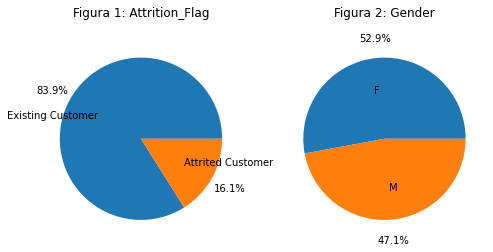

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 8))

plotarPizza(credit, 'Attrition_Flag', ax[0])
ax[0].set_title("Figura 1: Attrition_Flag\n")

plotarPizza(credit, 'Gender', ax[1])
ax[1].set_title('Figura 2: Gender\n')

plt.show()

Por meio da figura 1, é possível perceber que a grande maioria do banco de dados são de clientes ativos (aproximadamente 84%) e, como o interesse do estudo é de identificar as possíveis características de clientes inativos, essa pode ser vista como uma dificuldade, pois pressupõe-se que a amostra é representativa dos clientes inativos.

Já a figura 2 evidencia que o banco de dados apresenta uma proporção próxima de homens e mulheres, com uma maior proporção para as mulheres, aproximadamente de 53%.

Agora, será apresentado um gráfico de barras verticais para a variável *Marital_Status*. 

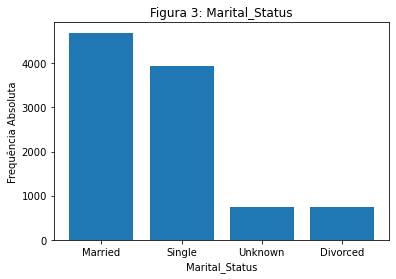

In [ ]:
marital_n = credit['Marital_Status'].value_counts()

plt.bar(marital_n.index, marital_n)
plt.title("Figura 3: Marital_Status")
plt.xlabel("Marital_Status")
plt.ylabel("Frequência Absoluta")
plt.show()

É notório que a maioria dos clientes é casado ou solteiro, com uma maior frequência para casados. Além disso, como comentado na seção anterior, esta variável apresenta valores desconhecidos, e ocorrência de valores desconhecidos é muito próxima da ocorrência de divorciados.

#### **Variáveis qualitativas ordinais**

Seguindo a análise dos demais atributos, veremos agora a contagem das variáveis qualitativas ordinais *Education_Level*, *Income_Category* e *Card_Category*. A fim de preservar essa característica, as barras estão dispostas seguindo a ordenação de cada uma dessas variáveis. Porém, como ressaltado em seções anteriores, as variáveis *Education_Level* e *Income_Category* possuem valores desconhecidos.

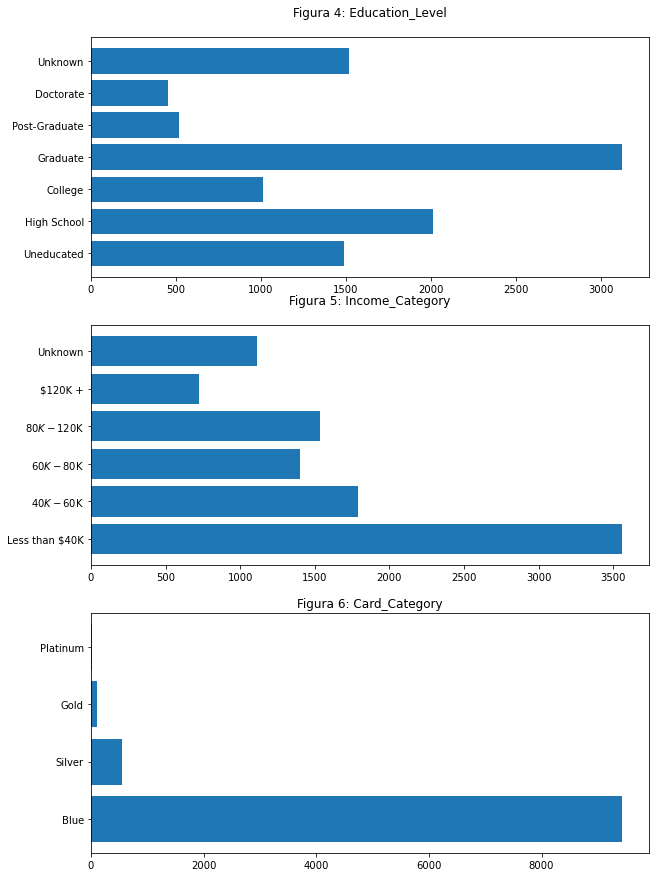

In [ ]:
fig, ax = plt.subplots(3, figsize = (10 , 15))

plotarBarras(credit, 'Education_Level', 
             ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'],
             ax[0])
ax[0].set_title("Figura 4: Education_Level\n")

plotarBarras(credit, 'Income_Category',
             ['Less than $40K', "$40K - $60K", "$60K - $80K", "$80K - $120K", '$120K +', 'Unknown'],
             ax[1])
ax[1].set_title('Figura 5: Income_Category\n')

plotarBarras(credit, 'Card_Category', 
             ['Blue', "Silver", "Gold", "Platinum"],
             ax[2])
ax[2].set_title('Figura 6: Card_Category')

plt.show()

Pela figura 4, é possível perceber que a escolaridade mais frequente no estudo é *Gradute* (estudantes que possuem bacharelado e estão cursando especialização), com mais de 3000 ocorrências. Por outro lado, a segunda categoria mais frequente é a de *High School* (Ensino Médio), ou seja, que concluíram apenas o ciclo básico. Por fim, o atributo contém mais de 1500 ocorrências com valor desconhecido, o que pode dificultar a análise.

A figura 5 revela que a primeira faixa salarial (40K-60K) é a categoria mais frequente e que, com exceção da faixa de 80K-120K, há uma tendência de redução da frequência absoluta, e consequentemente da relativa, ao passo que a faixa salarial aumenta. Dessa forma, clientes que contam com mais de 120K anualmente possuem menos ocorrências. Por fim, o atributo contém mais de 1000 ocorrências com valor desconhecido, o que também pode dificultar a análise.

Por fim, a figura 6 apresenta o cartão Blue como o mais frequente, presente em mais de 8000 clientes. Além disso, também é possível perceber que, seguindo a ordenação deste atributo, há uma frequência absoluta decrescente, sendo o cartão Platinum o de menor ocorrência. 

### **Variáveis quantitativas**

Nesta seção, as variáveis quantitativas serão descritas utilizando boxplots e histogramas. Para isso, será construído um *data frame* auxiliar que contém apenas as variáveis numéricas.

Esse subconjunto de atributos possui 15 atributos, sendo um o id do usuário, conforme apresentado a seguir.  

In [ ]:
credit_numeric = credit.select_dtypes(exclude = 'object')

print('\nA dimensão é: ', credit_numeric.shape)
display(credit_numeric.head(n = 5))


A dimensão é:  (10127, 15)


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Inicialmente, serão analisados os histogramas de todos os atributos. 


Figura 7: Histograma dos atributos quantitativos


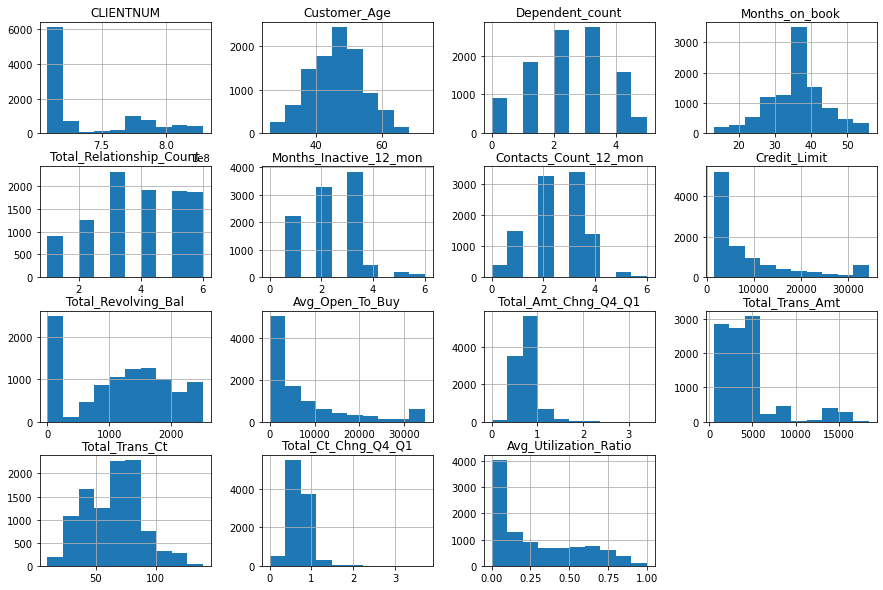

In [ ]:
print("\nFigura 7: Histograma dos atributos quantitativos")
credit_numeric.hist(figsize = (15,10))
plt.show()

Percebe-se que:
- a variável de idade possui um comportamento aproximadamente simétrico em torno de 45 anos, onde há maior concentração de clientes.
- Uma minoria de clientes não apresenta pelo menos um dependente e a maioria possui dois ou três dependentes
- Há uma concentração maior de clientes com 35 meses de relacionamento com o banco, o que fica próximo de 3 anos
- A maioria dos clientes tiveram algum relacionamento com o banco, sendo que clientes sem relacionamento são os menos frequentes
- A maioria dos clientes tiveram de 1 a 3 meses inativos nos últimos 12 meses
- A maioria dos clientes tiveram de 1 a 3 contatos nos últimos 12 meses
- O limite do cartão de crédito varia expressivamente e está concentrado nas menores faixas, com menor participação em faixas maiores
- O saldo do rotativo é próximo de 0, ou concentrado em torno de 1500
- O saldo disponível para compra possui uma distribuição muito próxima do limite de cartão de crédito
- Em geral, a quantia movimentada no Q4 é maior do que no Q1, mas não passa do dobro
- A quantia total de transações é mais frequente em até 5 mil dólares
- A quantidade total de transações é mais frequente de 60 a 80 transações
- A quantidade de transações do Q4 é maior do que no Q1, mas não passsa do dobro
- A distribuição da razão média de utilização é assimétrica a direita.

Alguns gráficos complementares serão apresentados a seguir com o intuito de enriquecer a análise destes pontos.

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

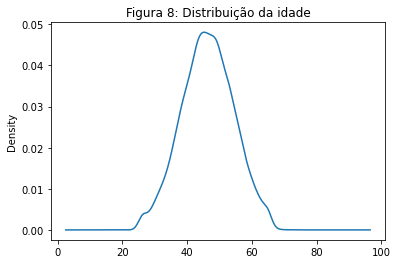

In [ ]:
age_serie = credit_numeric['Customer_Age']

display(age_serie.describe())

age_serie.plot(kind = 'density')
plt.title("Figura 8: Distribuição da idade")
plt.show()

A idade média dos clientes é de 46,3 anos e a mediana é de 46 anos, muito próxima da média, principalmente pelo caráter simétrico visto no gráfico da densidade. Alguns clientes são outliers no atributo de idade, sendo a idade máxima de 73 anos.

Também, é complementado na figura 9 a distribuição das variáveis *Months_Inactive_12_mon* e *Contacts_Count_12_mon*.

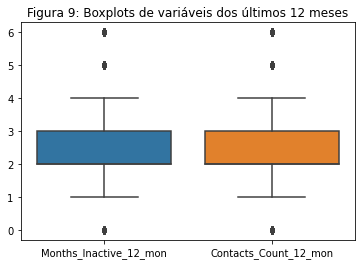

,Months_Inactive_12_mon,Contacts_Count_12_mon
count,10127.000000,10127.000000
mean,2.341167,2.455317
std,1.010622,1.106225
min,0.000000,0.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,6.000000,6.000000


In [ ]:
inactive_and_contact = credit_numeric[['Months_Inactive_12_mon', 'Contacts_Count_12_mon']]

sns.boxplot(data = inactive_and_contact)
plt.title("Figura 9: Boxplots de variáveis dos últimos 12 meses")
plt.show()

display(inactive_and_contact.describe())

É possível perceber que as duas variáveis apresentam uma distribuição muito similar. Os percentis 25%, 50% (mediana) e 75% são iguais e a média aritmética é levemente maior na variável de contatos nos últimos 12 meses.

### **Desbalanceamento de classes**

Por se tratar de um problema de aprendizado supervisionado de classificação, nota-se que as classes são desbalanceadas. Essa é uma condição que será importantíssima para a etapa da modelagem, pois a separação de conjunto de treino e de teste terá que levar em consideração esse fator.

In [ ]:
flag_count = credit["Attrition_Flag"].value_counts()
total_customers = sum(flag_count)

display(
    pd.DataFrame({
             "Count": flag_count.values,
              "Relative Count (%)": (flag_count.values/total_customers*100).round(1)
        },
    index = flag_count.index
    )
)

,Count,Relative Count (%)
Existing Customer,8500,83.9
Attrited Customer,1627,16.1


### **Relacionamentos bivariados**

Serão exploradas algumas variáveis conjuntamente. Esse passo é fundamental para a descoberta de padrões e tendências que são mascarados pela análise univariada, como por exemplo a associação de variáveis qualitativas e correlação de variáveis quantitativas.

Inicialmente, a figura 10 apresenta a matriz de correlação das variáveis numéricas.

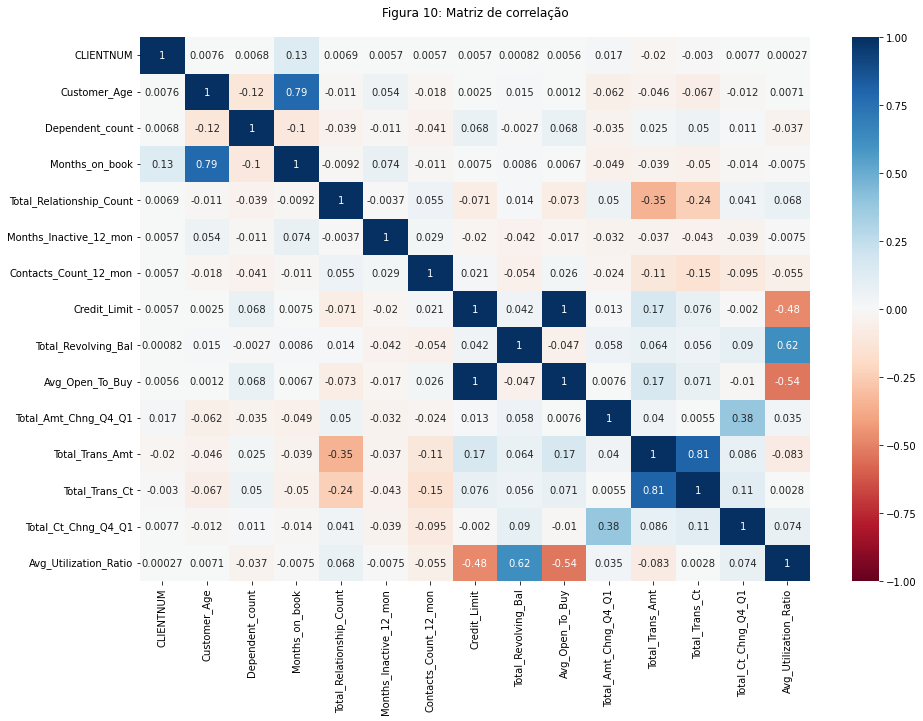

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Figura 10: Matriz de correlação\n")
sns.heatmap(credit_numeric.corr(), annot = True, cmap='RdBu', vmin=-1, vmax=1);

Entre as principais conclusões extraídas dessa figura, percebe-se que:

- A maior correlação apresentada para variáveis diferentes, isto é, fora da diagonal, é a de *Credit_Limit* com *Avg_Open_To_Buy*. Essa correlação é positiva e, por estar muito próxima de 1, esse resultado indica que, quase definitivamente, quanto maior o limite de crédito, maior o valor disponível para compra. Essa correlação é muito forte.
- A segunda maior correlação apresentada para variáveis diferentes é a de *Total_Trans_Ct* com *Total_Trans_Amt*, que é também é intuitiva, uma vez que, em geral, quanto mais transações um cliente faz, maior a quantia movimentada. Por ser próxima de 0,81, essa correlação é forte.
- A terceira maior correlação é entre *Customer_Age* e *Months_on_book*, indicando que há uma tendência de, quanto maior a idade do cliente, maior o tempo de relacionamento com o banco. Essa correlação também é forte.
- Há uma correlação negativa entre *Credit_Limit* e *Avg_Utilization_Ratio*, e também entre *Avg_Open_To_Buy* e *Avg_Utilization_Ratio*, já que Credit_Limit* com *Avg_Open_To_Buy* possuem uma correlação muito forte. Isso indica que, quanto menor o limite de crédito, maior a razão de utilização média. Isso faz pensar que o limite de cartão de crédito esteja associado a fatores como renda, descrita pela *Income_Category*.

Para corroborar alguns desses pressupostos, a

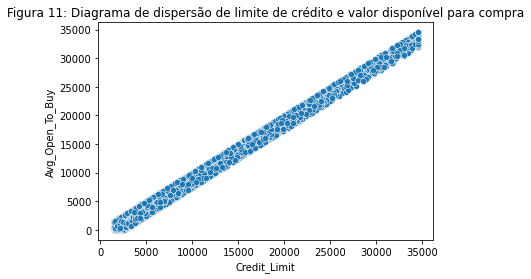

In [ ]:
sns.scatterplot(x = 'Credit_Limit', y = 'Avg_Open_To_Buy', data = credit)
plt.title("Figura 11: Diagrama de dispersão de limite de crédito e valor disponível para compra")
plt.show()

Essa análise corrobora que a associação entre *Credit_Limit* e *Avg_Open_To_Buy* são praticamente equivalentes, pois estão num reta de igualdade, parecido com a tradicional reta **y = x**, e numa escala muito próxima. Esse resultado indica que, possivelmente, apenas uma dessas variáveis é suficiente para a classificação de cliente ativo ou não.

Agora, será analisada a correlação negativa entre *Credit_Limit* e *Avg_Utilization_Ratio* na figura 12.

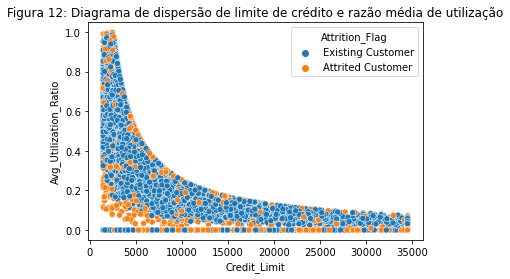

In [ ]:
sns.scatterplot(x = 'Credit_Limit', y = 'Avg_Utilization_Ratio', hue = 'Attrition_Flag', data = credit)
plt.title("Figura 12: Diagrama de dispersão de limite de crédito e razão média de utilização")
plt.show()

A figura 12 indica que, de fato, ao aumentar o limite do cartão de crédito, há uma tendência de menor média de utilização. Porém, ressalta-se desde já também que, para os menores limites, a variação da utilização é maior. Também, que os clientes inativos possuem, em geral, uma menor utilização, que é esperada.

Para conferir essa intuição, a tabela a seguir apresenta as principais medidas-resumo dessas variáveis por tipo de cliente.

In [ ]:
display(credit[['Attrition_Flag', 'Avg_Utilization_Ratio', 'Credit_Limit']].groupby("Attrition_Flag").describe())

Avg_Utilization_Ratio                                  \
                                  count      mean       std  min    25%   
Attrition_Flag                                                            
Attrited Customer                1627.0  0.162475  0.264458  0.0  0.000   
Existing Customer                8500.0  0.296412  0.272568  0.0  0.055   

                                         Credit_Limit               \
                     50%      75%    max        count         mean   
Attrition_Flag                                                       
Attrited Customer  0.000  0.23100  0.999       1627.0  8136.039459   
Existing Customer  0.211  0.52925  0.994       8500.0  8726.877518   

                                                                           
                           std     min     25%     50%       75%      max  
Attrition_Flag                                                             
Attrited Customer  9095.334105  1438.3  2114.0  4178.0   9933.50  34516.0  
Existing Customer  9084.969807  1438.3  2602.0  4643.5  11252.75  34516.0

Essa visualização indica que no mínimo 50% dos clientes inativos não utilizavam o cartão de crédito, pois a mediana é de 0. Além disso, o percentil 75% dos clientes inativos é menor do que a metade do percentil 75% dos clientes ativos. Também, em geral os percentis de limite de crédito dos clientes inativos são menores do que os do cliente ativo. 

Também, serão analisados os relacionamentos de algumas variáveis qualitativas. Essa análise não será exaustiva, pois apenas serão apresentados os relacionamentos que são mais pertinentes com a variável resposta.

Inicialmente, será construída uma função para a criação de tabelas, que é apresentada a seguir. 

In [ ]:
def getTabela(df, coluna):
    
    flag_coluna = credit.groupby(['Attrition_Flag', coluna]).size()

    indexes = pd.MultiIndex.from_tuples(flag_coluna.index, names = ['Customer', coluna])

    customer = []
    coluna_list = []
    i = 0
    valores = []

    for tupla in indexes:
        customer.append(tupla[0])
        coluna_list.append(tupla[1])
        valores.append(flag_coluna.values[i])
        i += 1

    final_df = pd.DataFrame(
            {'Customer' : customer,
            coluna : coluna_list,
            'Count': valores 
            }
        ).pivot_table(values = 'Count', index = coluna, columns = 'Customer')
    
    total1 = sum(final_df["Attrited Customer"])
    total2 = sum(final_df["Existing Customer"])
    
    final_df["% Attrited Customer"] = (final_df["Attrited Customer"]/total1*100).round(1)
    final_df["% Existing Customer"] = (final_df["Existing Customer"]/total2*100).round(1)
    
    return final_df[['% Attrited Customer', "% Existing Customer"]]

Será apresentado o relacionamento entre o tipo do cliente e a faixa de renda. Os valores estão dispostos em percentuais e são para cada tipo de cliente. Isto é, é o valor em relação ao total da coluna.

In [ ]:
display(
    getTabela(credit, 'Income_Category').reindex(
        ['Less than $40K', "$40K - $60K", "$60K - $80K", "$80K - $120K", '$120K +', 'Unknown']
    )
)

Customer,% Attrited Customer,% Existing Customer
Income_Category,,
Less than $40K,37.6,34.7
$40K - $60K,16.7,17.9
$60K - $80K,11.6,14.3
$80K - $120K,14.9,15.2
$120K +,7.7,7.1
Unknown,11.5,10.9


Para ambas os tipos de cliente, a categoria mais frequente de renda é a de menos que 40K, seguida de 40K-60K e 80K-120K, e a categoria menos frequente é a de 120K ou mais. Esses resultados estão de acordo com a distribuição univariada da faixa de renda. Ambos os tipos de clientes possuem um percentual próximo de valores desconhecidos.

Também será explorado o relacionamento do tipo de cliente com a escolaridade, que é apresentado a seguir.

In [ ]:
display(
    getTabela(credit, 'Education_Level').reindex(
        ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']
    )
)

Customer,% Attrited Customer,% Existing Customer
Education_Level,,
Uneducated,14.6,14.7
High School,18.8,20.1
College,9.5,10.1
Graduate,29.9,31.1
Post-Graduate,5.7,5.0
Doctorate,5.8,4.2
Unknown,15.7,14.9


A distribuição da escolaridade segundo o tipo de cliente é muito próxima, pois os percentuais são próximos para todas as categorias e, em particular, o percentual de desconhecidos. Sendo assim, há evidências amostrais de que a escolaridade não é relevante para a classificação do cliente.

Por fim, será análisado o relacionamento entre o sexo e o tipo do cliente.

In [ ]:
display(getTabela(credit, 'Marital_Status'))

Customer,% Attrited Customer,% Existing Customer
Marital_Status,,
Divorced,7.4,7.4
Married,43.6,46.8
Single,41.1,38.5
Unknown,7.9,7.3


Percebe-se que, independentemente do estado civil, as proporções de clientes ativos e inativos são próximas, com maior frequência para os clientes casados e solteiros, respectivamente. Sendo assim, há evidências amostrais de que o estado civil não aparenta ser relevante para a classificação do cliente.

## **Pré-processamento de dados**
---

Serão necessárias algumas funções para a realização do pré-processamento de dados. Para isso, as seguintes importações serão feitas:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import missingno as ms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## **Valores missings**

Conforme analisado na etapa de Análise de dados, não há valores *missings* de ofício no dataset. Essa análise pode ser confirmado pelo seguinte código:

In [ ]:
print(credit.isna().sum())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


Logo, como a soma é 0 para todas as colunas, não existem valores *missings*. Porém, há valores missings nos atributos de *Education_Level*, *Income_Category* e *Marital_Status*. 

Para utilizar a codificação apropriada, será utilizada a constante *NaN*, da biblioteca NumPy. Com isso, o mesmo código anterior agora consta os valores nulos. 

In [ ]:
pre_credit = credit.replace("Unknown", np.NaN, inplace = False)
print(pre_credit.isna().sum())

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


Outra visualização possível é por meio da biblioteca *missingno*, disposta a seguir:

Figura 13: Matriz de valores nulos

 AxesSubplot(0.125,0.125;0.698618x0.755)


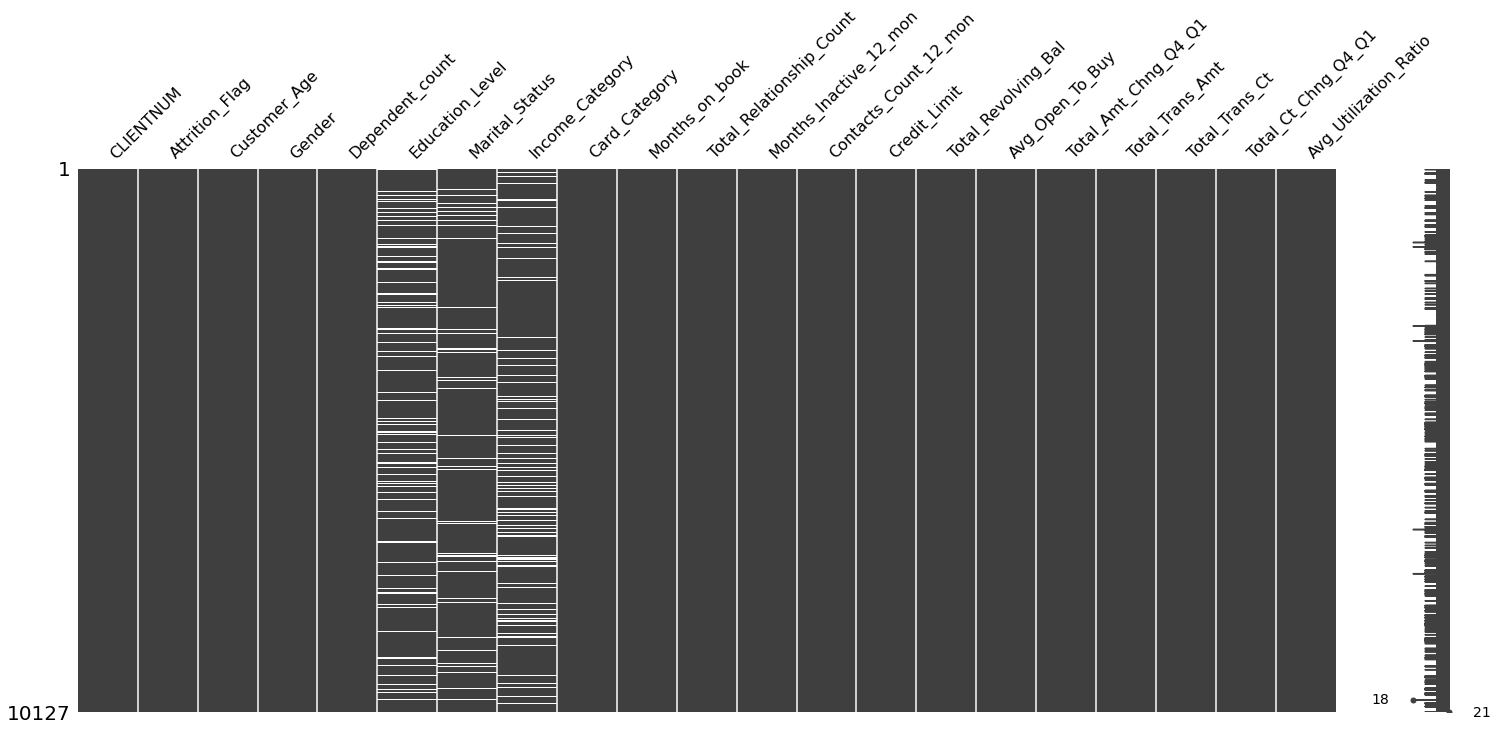

In [ ]:
print("Figura 13: Matriz de valores nulos\n\n", ms.matrix(pre_credit))

As linhas horizontais em branco indicam a presença de missings. Novamente, conclui-se que apenas as variáveis *Education_Level*, *Marital_Status* e *Income_Category* possuem missings. Pela análise abaixo, percebe-se que 3046 clientes apresentam pelo menos um missing nesses atributos.

In [ ]:
pre_credit_na = pre_credit[(pre_credit['Education_Level'].isna() + 
                    pre_credit["Marital_Status"].isna() + 
                    pre_credit['Income_Category'].isna()) > 0]

print(pre_credit_na.shape)

display(pre_credit_na.head(n = 5))

(3046, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,708790833,Existing Customer,42,M,5,Uneducated,NaN,$120K +,Blue,31,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
11,710821833,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174


Conforme discutido na etapa de Análise de dados, não há uma diferença significativa nos percentuais de clientes ativos e inativos nos atributos de *Education_Level* e *Marital_Status*. Sendo assim e por apresentar valors missings, esses atributos serão excluídos da análise. Além disso, como somente a variável *Income_Category* aparenta ser relevante, serão filtrados os valores que não são missings.

In [ ]:
pre_credit_filter = pre_credit.drop(['Education_Level', 'Marital_Status'], axis = 1, inplace = False)

pre_credit_filter = pre_credit_filter[pre_credit_filter["Income_Category"].notna()]

print(pre_credit_filter.shape)

(9015, 19)


Sendo assim, o *data frame* filtrado, sem a presença de missings, consta o registro de 9015 clientes, uma redução de quase 11% em relação ao total de clientes do *data frame* original. A figura 14 a seguir confirma a inexistência de missings no dataset.

Figura 14: Matriz de valores nulos pós filtro

 AxesSubplot(0.125,0.125;0.698618x0.755)


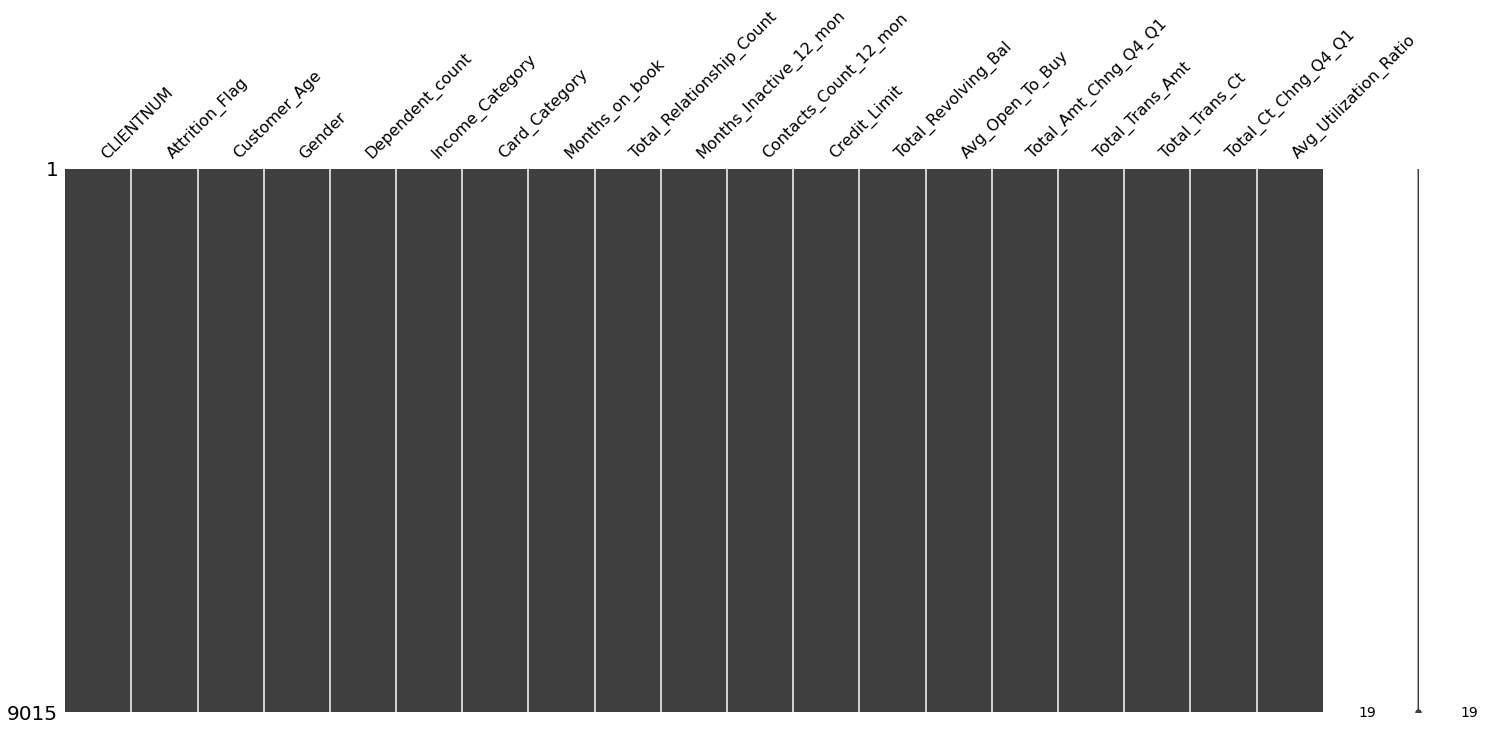

In [ ]:
print("Figura 14: Matriz de valores nulos pós filtro\n\n", ms.matrix(pre_credit_filter))

### **Valores de atributos quantitativos**

Diferentes versões dos dados serão salvas após a transformação das variáveis quantitativas, conforme detalhado em cada seção. Para facilitar a manipulação, será criado um data frame auxiliar que contenha apenas variáveis numéricas. Além disso, será excluído o ID do cliente, que não se aplica para a normalização e padronização. Desta forma, serão 14 atributos numéricos.

In [ ]:
pre_credit_filter_numeric = pre_credit_filter.select_dtypes(exclude = 'object').drop("CLIENTNUM", axis = 1, inplace = False)

print(pre_credit_filter_numeric.shape)

(9015, 14)


#### **Padronização**

A padronização visa obter um conjunto de dados com média 0 e variância 1 para obter uma distribuição próxima da distribuição normal padrão. O cálculo leva em consideração a média e o desvio padrão de cada coluna. A seguir, é apresentado os valores padronizados de cada coluna.

In [ ]:
print("Dados originais:")
display(pre_credit_filter_numeric.head(n = 5))

pre_credit_filter_padr = pd.DataFrame(StandardScaler().fit_transform(pre_credit_filter_numeric))
pre_credit_filter_padr.columns = pre_credit_filter_numeric.columns
print("\nDados padronizados:")
display(pre_credit_filter_padr.head(n = 5))

Dados originais:


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000



Dados padronizados:


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.167938,0.498069,0.384946,0.763262,-1.329784,0.492457,0.456425,-0.481790,0.499177,2.619726,-0.949093,-0.958037,3.849420,-0.792069
1,0.336254,2.042382,1.015999,1.405908,-1.329784,-0.410247,-0.029219,-0.374781,0.004146,3.557176,-0.906494,-1.338094,12.652666,-0.634061
2,0.588351,0.498069,0.006314,0.120616,-1.329784,-2.215655,-0.558993,-1.437487,-0.430895,8.349096,-0.733780,-1.887065,6.833000,-1.011126
3,-0.798179,1.270225,-0.246107,-0.522029,1.653790,-1.312951,-0.570491,1.658383,-0.717931,2.938277,-0.941269,-1.887065,6.833000,1.718107
4,-0.798179,0.498069,-1.886846,0.763262,-1.329784,-2.215655,-0.416859,-1.437487,-0.288801,6.442339,-1.044144,-1.549237,7.536754,-1.011126


Essa transformação foi apenas de caráter demonstrativo. É possível perceber que os valores estão majoritariamente próximos de 0, como esperado. Para auxiliar a visualização, são apresentadas as densidades de cada atributo.

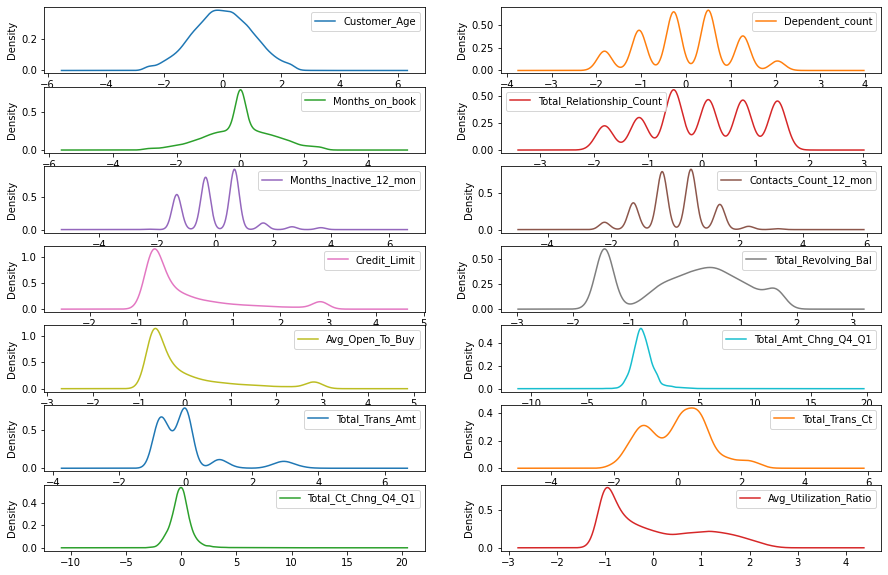

In [ ]:
pre_credit_filter_padr.plot(kind = 'density', subplots = True, layout = (7,2), sharex = False, figsize = (15,10))
plt.show()

A variável de *Customer_Age* foi a que mais se assemelhou a distribuição Normal, com uma simetria em torno de 0.

#### **Normalização**

O objetivo da normalização é a obtenção de valores numéricos no intervalo [0,1], considerando os valores de mínimo e máximo de cada atributo. Novamente, essa transformação será apenas de caráter demonstrativo. Os dados apresentados revelam as primeiras linhas da transformação.

In [ ]:
print("Dados originais:")
display(pre_credit_filter_numeric.head(n = 5))

pre_credit_filter_norm = pd.DataFrame(MinMaxScaler().fit_transform(pre_credit_filter_numeric))
pre_credit_filter_norm.columns = pre_credit_filter_numeric.columns
print("\nDados normalizados:")
display(pre_credit_filter_norm.head(n = 5))

Dados originais:


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000



Dados normalizados:


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000


### **Demais transformações**

Apenas para exemplificação, serão criadas duas colunas no dataset que serão uma variável simplificada do cliente e uma faixa etária do cliente.

In [ ]:
pre_credit_filter["Customer"] = pre_credit_filter["Attrition_Flag"].str.replace(" Customer", "")

def FaixaEtaria(idade):
    if idade < 30:
        faixa = "<=29"
    elif idade < 40:
        faixa = "30-39"
    elif idade < 50:
        faixa = "40-49"
    else:
        faixa = "50+"
    return faixa

pre_credit_filter["Age_Category"] = [FaixaEtaria(idade_) for idade_ in pre_credit_filter["Customer_Age"]]

out = pre_credit_filter[["Attrition_Flag", "Customer", "Customer_Age", "Age_Category"]]

display(pd.concat([out.head(n = 5), out.tail(n = 5)]))

,Attrition_Flag,Customer,Customer_Age,Age_Category
0,Existing Customer,Existing,45,40-49
1,Existing Customer,Existing,49,40-49
2,Existing Customer,Existing,51,50+
3,Existing Customer,Existing,40,40-49
4,Existing Customer,Existing,40,40-49
10122,Existing Customer,Existing,50,50+
10123,Attrited Customer,Attrited,41,40-49
10124,Attrited Customer,Attrited,44,40-49
10125,Attrited Customer,Attrited,30,30-39
10126,Attrited Customer,Attrited,43,40-49


Conforme apresentado, foram exibidas apenas as colunas transformadas e as suas dependentes para facilitar a visualização.